**Лабораторна робота №1. Лінійна і логістична регресія**

**Частина 1. Лінійна регресія**

Приблизний строк виконання - 8 годин

**Рекомендована дата здачі: 25 жовтня 2021 року**

Виконала студентка групи [КМ-11мн] [Коваленко Олександра Петрівна]

Студент здав роботу: (заповнюється викладачем відповідно до дати повідомлення з роботою у Slack)

Студент захистив роботу на оцінку: (заповнюється викладачем)

**Зауваження до виконання роботи: метод найменших квадратів, алгоритм градієнтного спуску і механізм К-кратної крос-валідації потрібно запрограмувати власноруч.**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import random

1. Обрати відповідний файл з даними.

In [ ]:
file_url = "https://raw.githubusercontent.com/IvanSergeyevichZhuk/ML_KPI/main/Data/Lab1/Part1/MN/MN09-Kovalenko.csv"
df = pd.read_csv(file_url)
df = df.set_axis(['values'], axis=1)
df = df['values'].str.split(';',expand=True).astype(np.float64)

TRAIN = df.iloc[:100]
TEST = df.iloc[-25:].reset_index(drop=True)

X_train = TRAIN.iloc[:,:-1]
Y_train = TRAIN.iloc[:,-1]
X_test = TEST.iloc[:,:-1]
Y_test = TEST.iloc[:,-1]

n = len(X_train[0])

train = df.iloc[:200]
test = df.iloc[-50:].reset_index(drop=True)

train_x = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

df

,0,1,2,3,4,5,6,7
0,0.630,0.455,0.150,1.1315,0.4810,0.2745,0.3050,9.0
1,0.630,0.480,0.150,1.2710,0.6605,0.2425,0.3100,11.0
2,0.630,0.490,0.225,1.3360,0.6805,0.2590,0.3245,10.0
3,0.635,0.505,0.145,1.1345,0.5050,0.2655,0.3150,10.0
4,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.3770,8.0
...,...,...,...,...,...,...,...,...
244,0.690,0.550,0.200,1.5690,0.6870,0.3675,0.4600,12.0
245,0.700,0.565,0.175,1.8565,0.8445,0.3935,0.5400,10.0
246,0.700,0.535,0.175,1.7730,0.6805,0.4800,0.5120,15.0
247,0.705,0.545,0.170,1.5800,0.6435,0.4565,0.2650,11.0


### MNK


2. Збудувати модель множинної лінійної регресії, використовуючи метод найменших квадратів, обравши в якості залежної змінної останній стовпчик, а всі інші – в якості незалежних змінних. Для побудови моделі використовувати перші 100 записів у файлі з даними. Для перевірки моделі використовувати останні 25 записів.

In [ ]:
def fit_MNK(X_train, Y_train):

  n = len(X_train)  
  y = Y_train
  S_y = sum(y)
  
  S_x0 = sum(X_train[0])
  S_x1 = sum(X_train[1])
  S_x2 = sum(X_train[2])
  S_x3 = sum(X_train[3])
  S_x4 = sum(X_train[4])
  S_x5 = sum(X_train[5])
  S_x6 = sum(X_train[6])
  
  S_x00 = sum([X_train[0][i] ** 2 for i in range(n)])
  S_x11 = sum([X_train[1][i] ** 2 for i in range(n)])
  S_x22 = sum([X_train[2][i] ** 2 for i in range(n)])
  S_x33 = sum([X_train[3][i] ** 2 for i in range(n)])
  S_x44 = sum([X_train[4][i] ** 2 for i in range(n)])
  S_x55 = sum([X_train[5][i] ** 2 for i in range(n)])
  S_x66 = sum([X_train[6][i] ** 2 for i in range(n)])

  S_x0x1 = sum([X_train[0][i] * X_train[1][i] for i in range(n)])
  S_x0x2 = sum([X_train[0][i] * X_train[2][i] for i in range(n)])
  S_x0x3 = sum([X_train[0][i] * X_train[3][i] for i in range(n)])
  S_x0x4 = sum([X_train[0][i] * X_train[4][i] for i in range(n)])
  S_x0x5 = sum([X_train[0][i] * X_train[5][i] for i in range(n)])
  S_x0x6 = sum([X_train[0][i] * X_train[6][i] for i in range(n)])

  S_x1x2 = sum([X_train[1][i] * X_train[2][i] for i in range(n)])
  S_x1x3 = sum([X_train[1][i] * X_train[3][i] for i in range(n)])
  S_x1x4 = sum([X_train[1][i] * X_train[4][i] for i in range(n)])
  S_x1x5 = sum([X_train[1][i] * X_train[5][i] for i in range(n)])
  S_x1x6 = sum([X_train[1][i] * X_train[6][i] for i in range(n)])

  S_x2x3 = sum([X_train[2][i] * X_train[3][i] for i in range(n)])
  S_x2x4 = sum([X_train[2][i] * X_train[4][i] for i in range(n)])
  S_x2x5 = sum([X_train[2][i] * X_train[5][i] for i in range(n)])
  S_x2x6 = sum([X_train[2][i] * X_train[6][i] for i in range(n)])

  S_x3x4 = sum([X_train[3][i] * X_train[4][i] for i in range(n)])
  S_x3x5 = sum([X_train[3][i] * X_train[5][i] for i in range(n)])
  S_x3x6 = sum([X_train[3][i] * X_train[6][i] for i in range(n)])

  S_x4x5 = sum([X_train[4][i] * X_train[5][i] for i in range(n)])
  S_x4x6 = sum([X_train[4][i] * X_train[6][i] for i in range(n)])

  S_x5x6 = sum([X_train[5][i] * X_train[6][i] for i in range(n)])

  S_yx0 = sum([y[i] * X_train[0][i] for i in range(n)])
  S_yx1 = sum([y[i] * X_train[1][i] for i in range(n)])
  S_yx2 = sum([y[i] * X_train[2][i] for i in range(n)])
  S_yx3 = sum([y[i] * X_train[3][i] for i in range(n)])
  S_yx4 = sum([y[i] * X_train[4][i] for i in range(n)])
  S_yx5 = sum([y[i] * X_train[5][i] for i in range(n)])
  S_yx6 = sum([y[i] * X_train[6][i] for i in range(n)])

  A = np.array([[n, S_x0, S_x1 ,S_x2, S_x3, S_x4, S_x5, S_x6],
     [S_x0, S_x00, S_x0x1, S_x0x2, S_x0x3, S_x0x4, S_x0x5, S_x0x6],
     [S_x1, S_x0x1, S_x11, S_x1x2, S_x1x3, S_x1x4, S_x1x5, S_x1x6],
     [S_x2, S_x0x2, S_x1x2, S_x22, S_x2x3, S_x2x4, S_x2x5, S_x2x6],
     [S_x3, S_x0x3, S_x1x3, S_x2x3, S_x33, S_x3x4, S_x3x5, S_x3x6],
     [S_x4, S_x0x4, S_x1x4, S_x2x4, S_x3x4, S_x44, S_x4x5, S_x4x6],
     [S_x5, S_x0x5, S_x1x5, S_x2x5, S_x3x5, S_x4x5, S_x55, S_x5x6],
     [S_x6, S_x0x6, S_x1x6, S_x2x6, S_x3x6, S_x4x6, S_x5x6, S_x66]])

  B = np.array([S_y, S_yx0, S_yx1, S_yx2, S_yx3, S_yx4, S_yx5, S_yx6])
  x = np.linalg.solve(A, B)
  return x


In [ ]:
def predict(x, X_test):
  x02 = np.array(X_test[0])
  x12 = np.array(X_test[1])
  x22 = np.array(X_test[2])
  x32 = np.array(X_test[3])
  x42 = np.array(X_test[4])
  x52 = np.array(X_test[5])
  x62 = np.array(X_test[6])

  L = x[0] + x[1] * x02 + x[2] *x12 + x[3] * x22 + x[4] * x32 + x[5] * x42 + x[6] * x52 + x[7] * x62
  return L


In [ ]:
MNK = fit_MNK(X_train, Y_train)
predict_MNK = predict(MNK, X_test)
predict_MNK

array([10.36055433, 10.50013788, 10.75037616, 10.29310338,  9.69585373,
       10.47926568, 10.03057934, 10.19434169,  9.8785176 ,  9.89066332,
       10.16498808, 10.32804928, 10.35582971, 10.86168895, 10.20047098,
       10.4033118 , 10.01315899, 10.97589034, 10.340955  , 10.53066314,
       10.65226102, 11.23914248, 10.2484652 ,  8.99958261, 11.24992166])

3. Оцінити статистичну значимість коефіцієнтів отриманої моделі.

Додатковий матеріал:

*13.7. Определение доверительных интервалов для коэффициентов и функции регрессии*. Теория вероятностей и математическая статистика (рос.), Кремер Н.Ш. - 2-изд. - 2004 - с.484-488 


In [ ]:
def R2(y_test, predict):
  n = len(y_test)
  y_med = sum(y_test) / n
  R_2 = 1 - sum((predict[i] - y_test[i]) ** 2 for i in range(n)) / sum((y_med - y_test[i]) ** 2 for i in range(n))
  return R_2

In [ ]:
R_2 = R2(Y_test, predict_MNK)
F = (R_2 / (1 - R_2)) * ((n - 8 -1) / 8)
F

-4.147757117652712

4. Оцінити адекватність збудованої моделі за допомогою коефіцієнту
множинної детермінації.

Додатковий матеріал:

*13.8. Оценка взаимосвязи переменных. Проверка значимости уравнения множественного регрессии.* Теория вероятностей и математическая статистика (рос.), Кремер Н.Ш. - 2-изд. - 2004 - с.488-491

In [ ]:
R_2

-0.5739058704922879

## MGD

5. Збудувати модель множинної лінійної регресії (з тими самими аргументами, що у п. 2), використовуючи метод градієнтного спуску.

In [ ]:
def fit_MGD(X, Y):

  theeta0 = 0
  theeta1 = 0
  theeta2 = 0
  theeta3 = 0
  theeta4 = 0
  theeta5 = 0
  theeta6 = 0
  theeta7 = 0

  a = 0.0001  
  iter = 10000
  n = float(len(X[0])) 
  result = np.zeros(iter)

  for i in range(iter): 
      predict = theeta0 + theeta1*X[0] + theeta2 * X[1] + theeta3 * X[2] + theeta4 * X[3] + theeta5 * X[4] + theeta6 * X[5] + theeta7 * X[6]
      d = predict - Y
      
      cost = (1/2 * n) * sum(d * d) 

      result[i] =  cost  
       
      t_1 = (1/n) * sum(d) 
      t_2 = (1/n) * sum(X[0] * (d)) 
      t_3 = (1/n) * sum(X[1] * (d)) 
      t_4 = (1/n) * sum(X[2] * (d))
      t_5 = (1/n) * sum(X[3] * (d)) 
      t_6 = (1/n) * sum(X[4] * (d))
      t_7 = (1/n) * sum(X[5] * (d))
      t_8 = (1/n) * sum(X[6] * (d))
   
    
      theeta0 = theeta0 - a * t_1 
      theeta1 = theeta1 - a * t_2 
      theeta2 = theeta2 - a * t_3 
      theeta3 = theeta3 - a * t_4 
      theeta4 = theeta4 - a * t_5 
      theeta5 = theeta5 - a * t_6 
      theeta6 = theeta6 - a * t_7 
      theeta7 = theeta7 - a * t_8 

      theeta = np.array([theeta0, theeta1, theeta2, theeta3, theeta4, theeta5, theeta6, theeta7]) 

  #print(plt.plot(range(iter),result))

  return theeta

In [ ]:
MGD = fit_MGD(X_train, Y_train)
predict_MGD = predict(MGD, X_test)
predict_MGD

array([ 9.6886293 , 10.36260266, 10.44343155, 10.70046856, 10.1125047 ,
        9.57375522,  9.5882077 ,  9.85673932,  9.58473612,  9.50917883,
        9.94090701,  9.66227097, 10.6528561 , 10.72815429,  9.55869284,
        9.8914139 , 10.12992248, 10.65789411,  9.94443861, 10.87409399,
       10.60801457, 11.60709832, 11.19787981, 10.50544154, 12.20756777])

In [ ]:
R_2_MGD = R2(Y_test, predict_MGD)
F_MGD = (R_2_MGD / (1 - R_2_MGD)) * ((n - 8 -1) / 8)
R_2_MGD, F

(-0.5805886520741561, -4.147757117652712)

6. 1) Вивести обчислені абсолютні похибки збудованих моделей регресії для записів, призначених для перевірки моделі.

2) Візуалізуйте ці похибки, вивівши на графік значення моделі як лінійну функцію і дійсні значення як окремі точки. В якості горизонтальної осі візьміть будь-яку значиму змінну на власний розсуд.

Альтернативні варіанти візуалізації:
*   confidence bands - https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html#example-confidence-bands
*   errorbar - https://matplotlib.org/stable/gallery/lines_bars_and_markers/errorbar_subsample.html#sphx-glr-gallery-lines-bars-and-markers-errorbar-subsample-py




In [ ]:
def absolute_error(predict, y_test):
  absolute_error = abs(predict-(y_test.to_numpy()))
  return absolute_error

In [ ]:
def predict_plot(y_test, predict):
  fig, ax = plt.subplots(1,1, figsize=(16, 8))
  ax.plot(y_test.to_numpy(), 'bo' , label = 'Дійснo')
  ax.plot(predict, label = 'Прогноз')
  ax.legend(loc="upper right")
  ax.set_title('Візуалізація похибки')


In [ ]:
absolute_error_MNK = absolute_error(predict_MNK, Y_test)
absolute_error_MNK

array([1.36055433, 1.49986212, 0.75037616, 3.70689662, 1.30414627,
       0.52073432, 0.96942066, 1.80565831, 0.8785176 , 2.10933668,
       0.83501192, 2.67195072, 0.35582971, 0.13831105, 2.79952902,
       0.4033118 , 0.01315899, 0.02410966, 0.659045  , 0.46933686,
       1.34773898, 1.23914248, 4.7515348 , 2.00041739, 0.24992166])

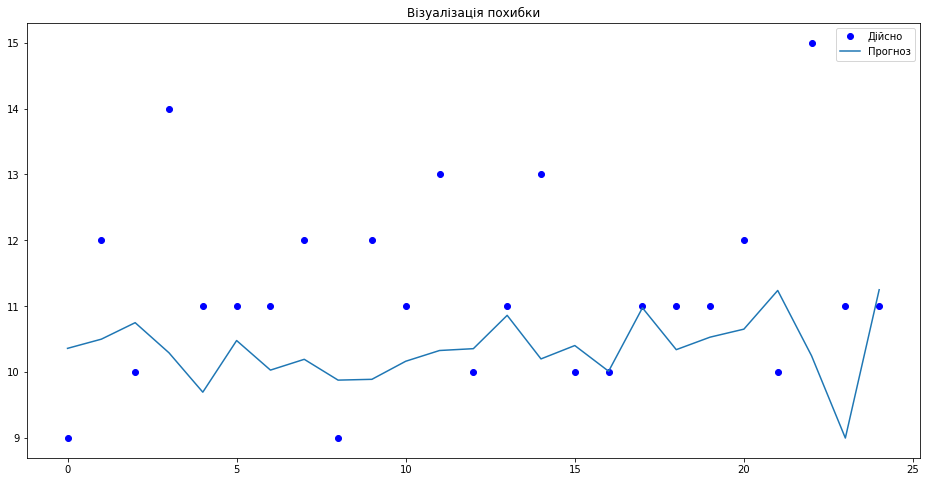

In [ ]:
plot_MNK = predict_plot(Y_test, predict_MNK) 
plot_MNK

In [ ]:
absolute_error_MGD = absolute_error(predict_MGD, Y_test)
absolute_error_MGD

array([0.6886293 , 1.63739734, 0.44343155, 3.29953144, 0.8874953 ,
       1.42624478, 1.4117923 , 2.14326068, 0.58473612, 2.49082117,
       1.05909299, 3.33772903, 0.6528561 , 0.27184571, 3.44130716,
       0.1085861 , 0.12992248, 0.34210589, 1.05556139, 0.12590601,
       1.39198543, 1.60709832, 3.80212019, 0.49455846, 1.20756777])

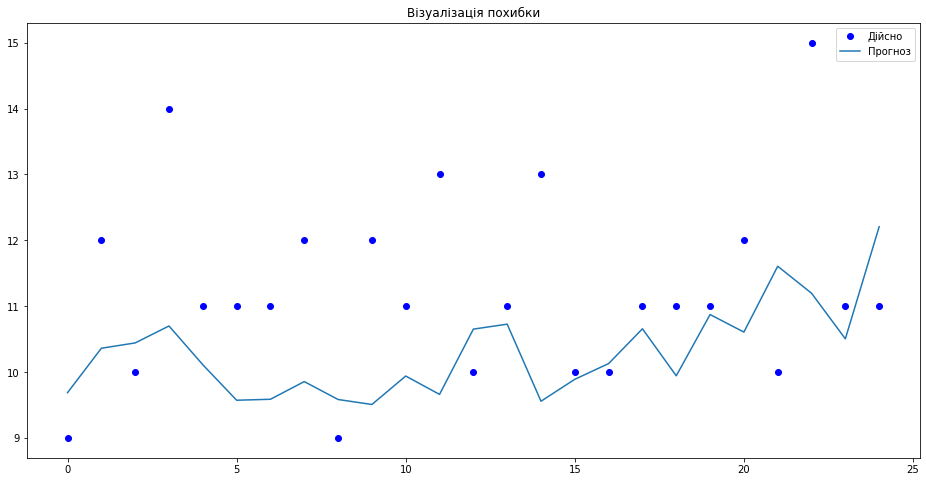

In [ ]:
plot_MGD = predict_plot(Y_test, predict_MGD) 
plot_MGD

7. Для отриманих моделей обчисліть значення цільової функції, яку використовували для оптимізації в пунктах 2 та 5.

In [ ]:
df_pred=pd.DataFrame()
df_pred["y_actual"] = Y_test.to_numpy()
df_pred["MNK"]=np.round(predict_MNK, 3)
df_pred["MGD"]=np.round(predict_MGD, 3)
df_pred

,y_actual,MNK,MGD
0,9.0,10.361,9.689
1,12.0,10.500,10.363
2,10.0,10.750,10.443
3,14.0,10.293,10.700
4,11.0,9.696,10.113
5,11.0,10.479,9.574
6,11.0,10.031,9.588
7,12.0,10.194,9.857
8,9.0,9.879,9.585
9,12.0,9.891,9.509


8. Виконати пункти 2-7, використовуючи перші 200 записів з файлу для навчання моделей і 50 останніх записів з файлу для тестування.

In [ ]:
MNK2 = fit_MNK(train_x, train_y)
predict_MNK2 = predict(MNK2, test_x)
predict_MNK2

array([10.353302  ,  9.86821064, 10.10886963, 10.14748484, 10.16537268,
       10.61597338, 10.13666212, 10.17876257, 10.38382397, 10.32248418,
       10.49535276, 10.3807013 , 10.2749198 , 10.14668304,  9.9489742 ,
       10.07609125, 10.27273164, 10.15650826, 10.50801471, 10.54449548,
       10.529248  , 10.63769642, 10.14845941, 10.42657293, 10.13713108,
       10.51860923, 10.94274447, 10.76304291, 10.78706114, 10.29965684,
       10.54706853, 10.35182594, 10.41496611, 10.12799672, 10.21626743,
       10.74524006, 10.25032019, 11.29106711, 11.08122717, 10.5259397 ,
       10.3244172 , 10.13660944, 10.74619698, 10.79729553, 11.22408262,
       10.85431379, 11.62947371, 10.54107685, 10.25102176, 11.78683515])

In [ ]:
R_2_MNK2 = R2(test_y, predict_MNK2)
F_MNK2 = (R_2_MNK2 / (1 - R_2_MNK2)) * ((n - 8 -1) / 8)
R_2_MNK2, F_MNK2

(-0.018805660337684937, -0.20996584007028765)

In [ ]:
MGD2 = fit_MGD(train_x, train_y)
predict_MGD2 = predict(MGD2, test_x)
predict_MGD2

array([10.54994565,  9.87669359,  9.90299374,  9.78853204,  9.92912619,
       11.64565808,  9.58613848, 10.05695686, 11.10412989, 10.76696734,
        9.89337551, 10.27478118,  9.89713973, 10.2230834 , 10.32856443,
        9.79654777, 10.40978431, 10.23526796, 10.04778594, 10.82286363,
       10.42638457, 10.12028011,  9.18462788, 10.32401167, 10.71902622,
       10.25644355, 11.00617056, 11.09795723, 11.38334075, 10.72616005,
       10.12856845, 10.14340689, 10.44292417, 10.13932642, 10.05461687,
       10.5340772 , 10.22645446, 11.32633037, 11.41262843, 10.10930034,
       10.48076475, 10.74543799, 11.3352504 , 10.5374104 , 11.57185701,
       11.27606745, 12.38893794, 11.93425009, 11.15631271, 13.05390114])

In [ ]:
R_2_MGD2 = R2(Y_test, predict_MGD2)
F_MGD2 = (R_2_MGD2 / (1 - R_2_MGD2)) * ((n - 8 -1) / 8)
R_2_MGD, F_MGD2

(-0.5805886520741561, -5.43055373891371)

In [ ]:
absolute_error_MNK2 = absolute_error(predict_MNK2, test_y)
absolute_error_MNK2

array([1.646698  , 0.13178936, 1.10886963, 0.14748484, 0.16537268,
       0.38402662, 0.13666212, 1.82123743, 3.61617603, 1.32248418,
       0.49535276, 1.3807013 , 1.2749198 , 0.14668304, 0.0510258 ,
       1.07609125, 1.72726836, 1.15650826, 0.49198529, 0.45550452,
       1.529248  , 0.63769642, 1.14845941, 1.57342707, 0.86286892,
       1.51860923, 1.05725553, 0.76304291, 3.21293886, 0.70034316,
       0.45293147, 0.64817406, 1.58503389, 1.12799672, 1.78373257,
       0.25475994, 2.74967981, 1.29106711, 0.08122717, 2.4740603 ,
       0.3244172 , 0.13660944, 0.25380302, 0.20270447, 0.22408262,
       1.14568621, 1.62947371, 4.45892315, 0.74897824, 0.78683515])

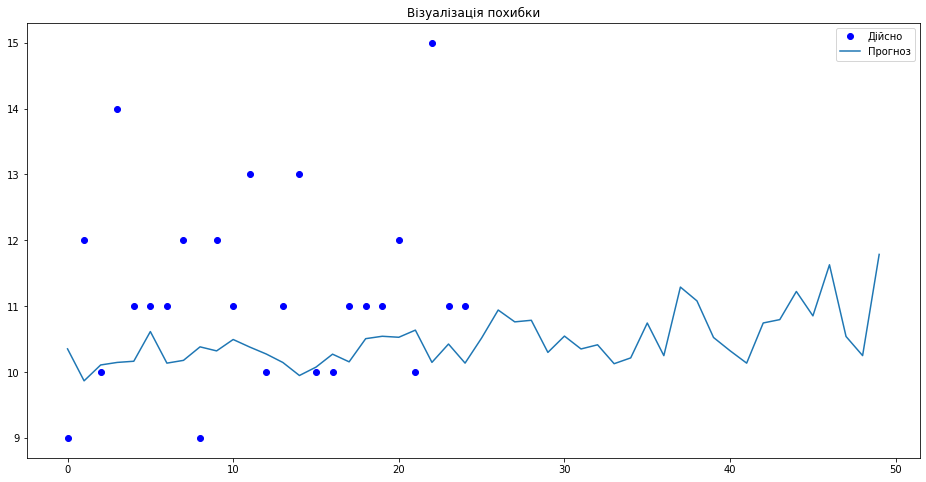

In [ ]:
plot_MNK2 = predict_plot(Y_test, predict_MNK2) 
plot_MNK2

In [ ]:
absolute_error_MGD2 = absolute_error(predict_MGD2, test_y)
absolute_error_MGD2

array([1.45005435, 0.12330641, 0.90299374, 0.21146796, 0.07087381,
       0.64565808, 0.41386152, 1.94304314, 2.89587011, 1.76696734,
       0.10662449, 1.27478118, 0.89713973, 0.2230834 , 0.32856443,
       0.79654777, 1.59021569, 1.23526796, 0.95221406, 0.17713637,
       1.42638457, 0.12028011, 0.18462788, 1.67598833, 0.28097378,
       1.25644355, 0.99382944, 1.09795723, 2.61665925, 0.27383995,
       0.87143155, 0.85659311, 1.55707583, 1.13932642, 1.94538313,
       0.4659228 , 2.77354554, 1.32633037, 0.41262843, 2.89069966,
       0.48076475, 0.74543799, 0.3352504 , 0.4625896 , 0.57185701,
       0.72393255, 2.38893794, 3.06574991, 0.15631271, 2.05390114])

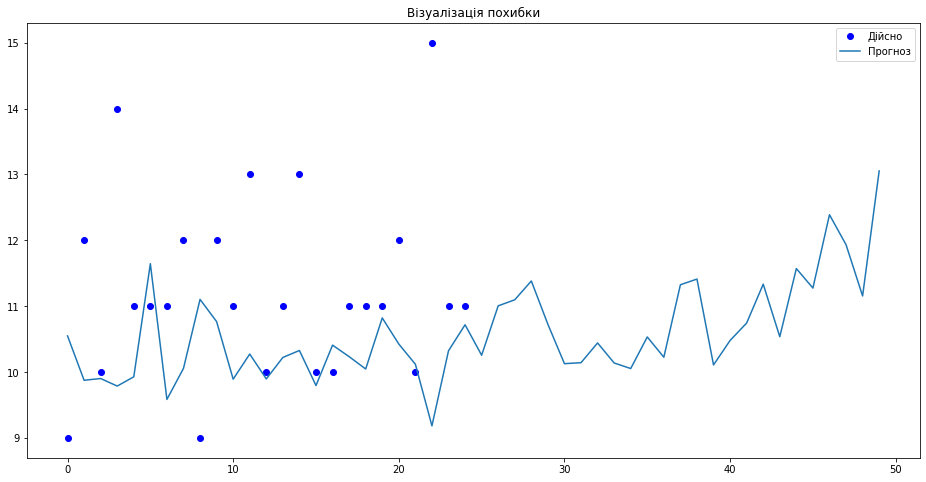

In [ ]:
plot_MGD2 = predict_plot(Y_test, predict_MGD2) 
plot_MGD2

In [ ]:
df_pred=pd.DataFrame()
df_pred["y_actual"] = test_y.to_numpy()
df_pred["MNK"]=np.round(predict_MNK2, 3)
df_pred["MGD"]=np.round(predict_MGD2, 3)
df_pred

,y_actual,MNK,MGD
0,12.0,10.353,10.550
1,10.0,9.868,9.877
2,9.0,10.109,9.903
3,10.0,10.147,9.789
4,10.0,10.165,9.929
5,11.0,10.616,11.646
6,10.0,10.137,9.586
7,12.0,10.179,10.057
8,14.0,10.384,11.104
9,9.0,10.322,10.767


9. Виконати пункти 2-7, використавши алгоритм k-кратної крос валідацію (K-Fold cross validation) до наданого датасету.

Додатковий матеріал: 

1.   A Gentle Introduction to k-fold Cross-Validation - https://machinelearningmastery.com/k-fold-cross-validation/
2.  Cross-validation: evaluating estimator performance - https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance
3. Jeff Schneider: Cross Validation - https://www.cs.cmu.edu/~schneide/tut5/node42.html



In [ ]:
S0=(df[:50]).reset_index(drop=True)
S1=(df[50:100]).reset_index(drop=True)
S2=(df[100:150]).reset_index(drop=True)
S3=(df[150:200]).reset_index(drop=True)
S4=(df[-50:]).reset_index(drop=True)

set0=pd.concat([S4,S3,S1,S2,S0], ignore_index=True)
set1=pd.concat([S4,S2,S0,S3,S1], ignore_index=True)
set2=pd.concat([S1,S0,S4,S3,S2], ignore_index=True)
set3=pd.concat([S0,S4,S1,S2,S3], ignore_index=True)
set4=pd.concat([S3,S2,S1,S4,S0], ignore_index=True)

In [ ]:
def k_fold(method, KFV_train, KFV_test):
    
    KFV_df = method(KFV_train.iloc[:,:-1], KFV_train.iloc[:,-1])
    KFV = predict(KFV_df, KFV_test.iloc[:,:-1])
    ytest = KFV_test.iloc[:,-1]
    n = len(ytest)
    y_med = sum(ytest) / len(ytest)
    R_2 = 1 - sum((KFV[i] - ytest[i]) ** 2 for i in range(n)) / sum((y_med - ytest[i]) ** 2 for i in range(n)) 
    F = (R_2 / (1 - R_2)) * ((n - 8 -1) / 8)
    KFV_plot = predict_plot(ytest, KFV) 
    print(R_2, F)
    return R_2, F

0.8306546500141943 25.138600390737444
0.1365682529735991 0.8106168193376544
0.022595671079040924 0.1184799482195147
0.23421688764217152 1.5674954563443475
0.11939987238265759 0.6948946823535175


(0.11939987238265759, 0.6948946823535175)

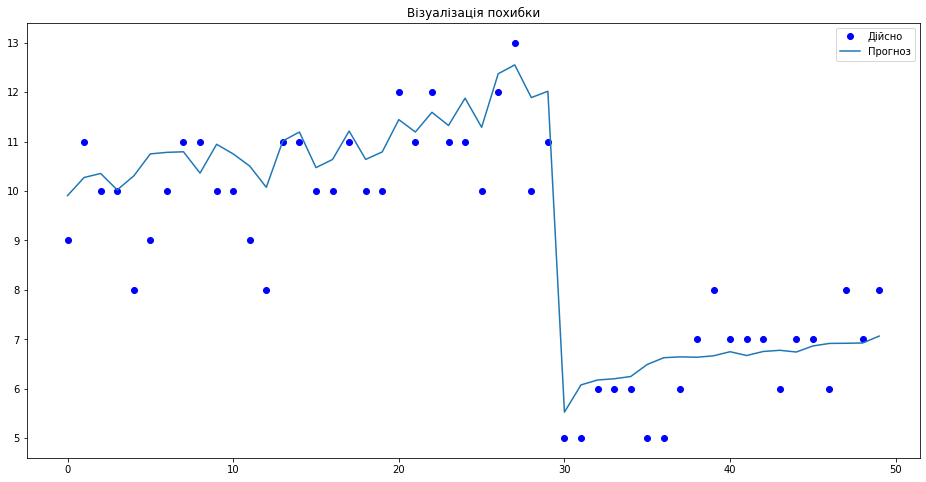

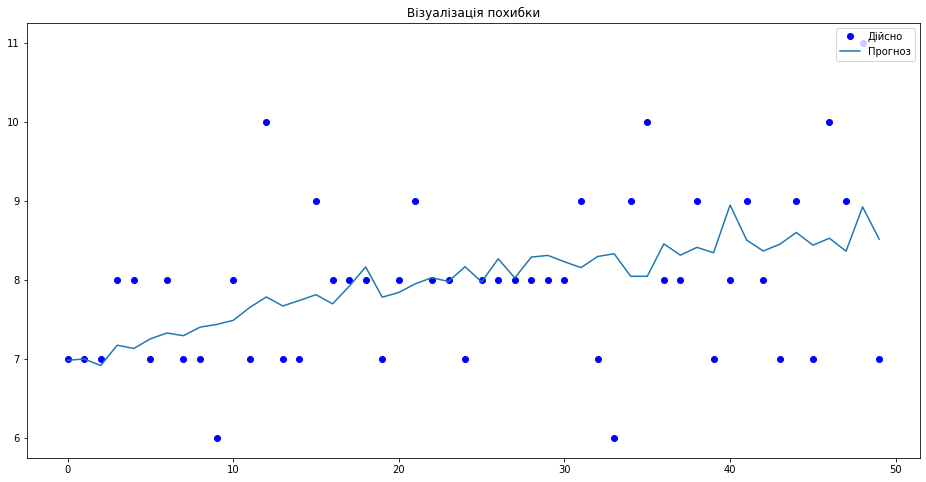

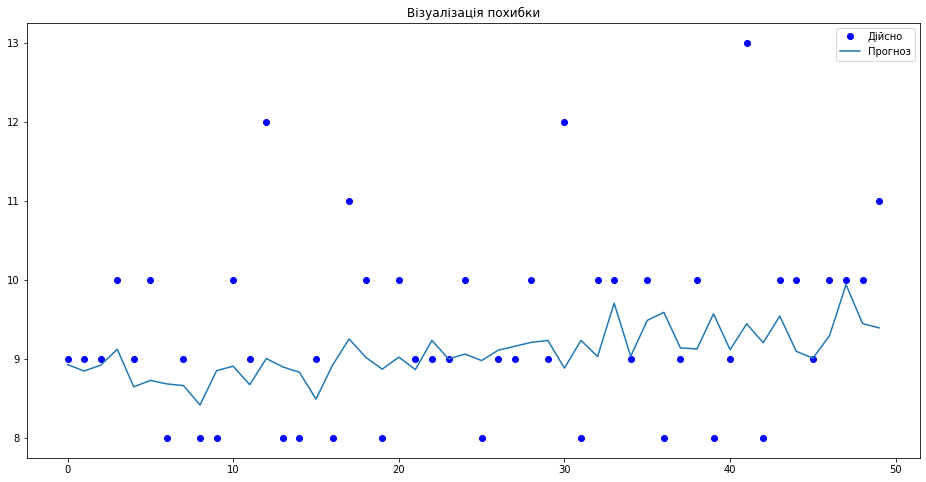

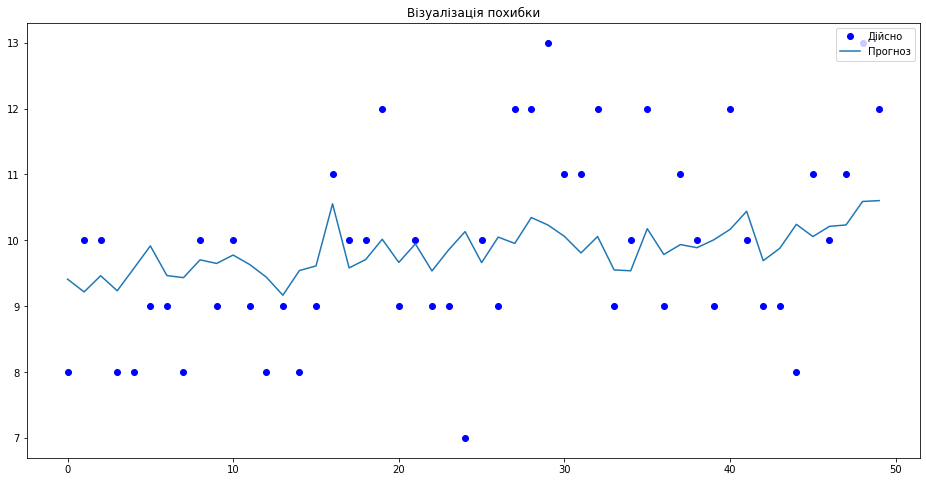

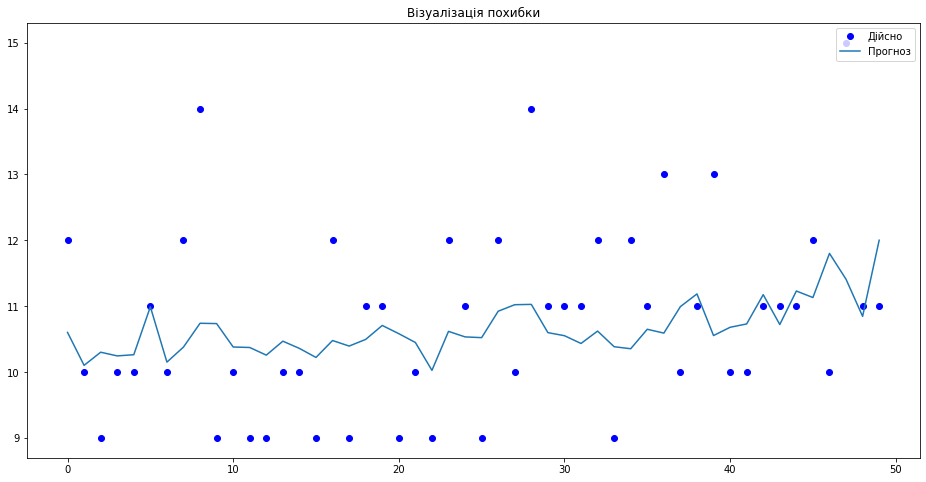

In [ ]:
k_fold(fit_MNK, set0, S0)
k_fold(fit_MNK, set1, S1)
k_fold(fit_MNK, set2, S2)
k_fold(fit_MNK, set3, S3)
k_fold(fit_MNK, set4, S4)


0.561623407534082 6.565861437585649
-1.806048480014116 -3.2985882196966827
-1.2417271751277257 -2.838816356931126
0.19712046464154753 1.2582739213011573
0.09892246395509618 0.5626348538164018


(0.09892246395509618, 0.5626348538164018)

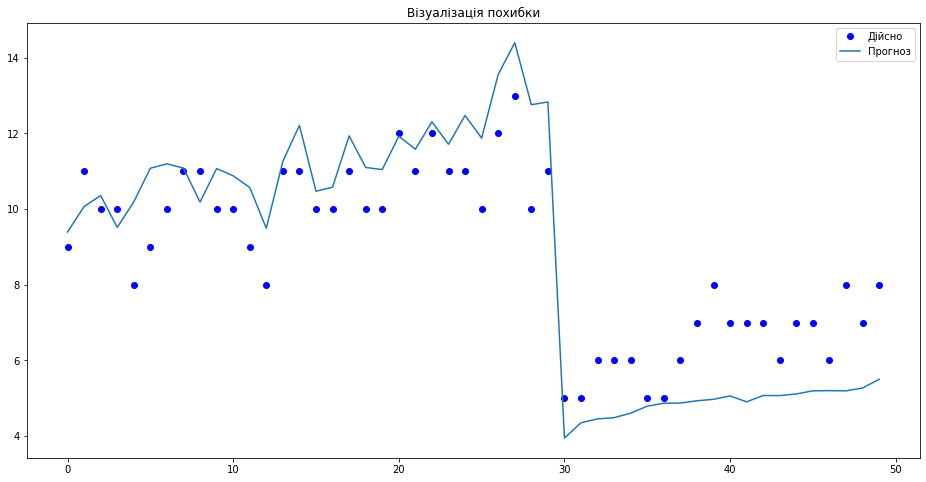

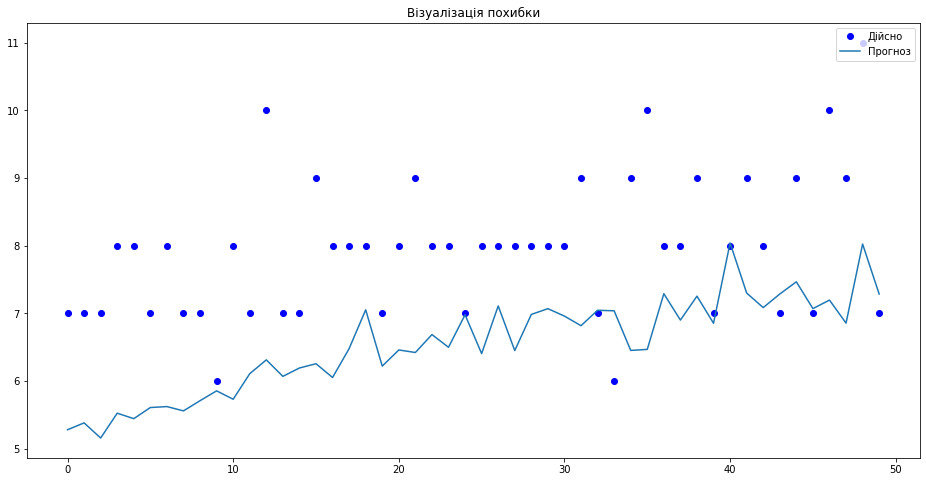

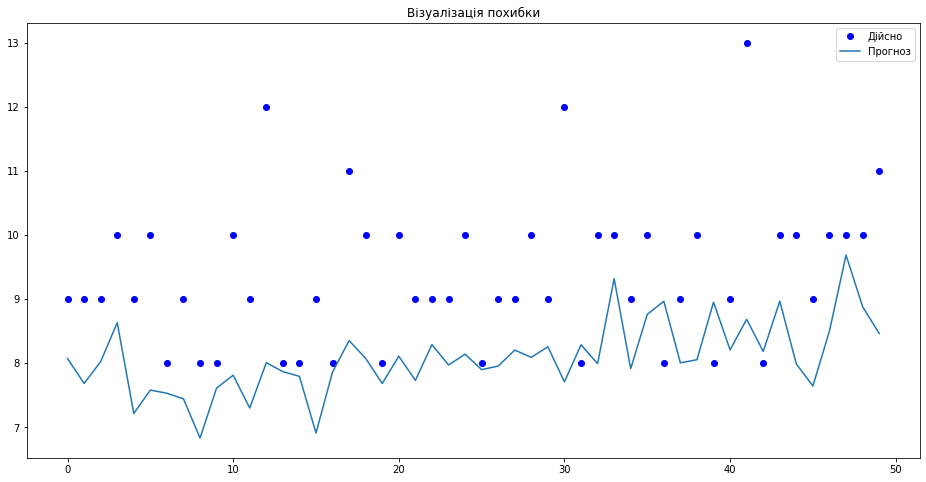

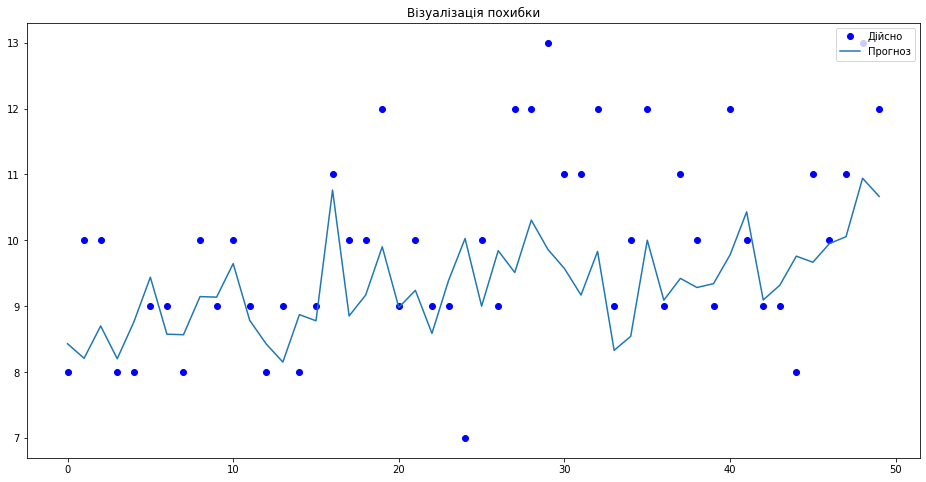

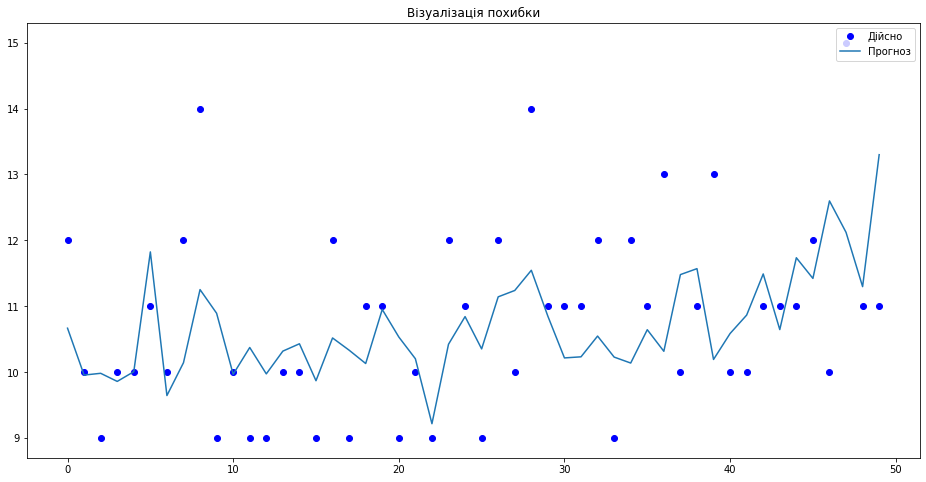

In [ ]:
k_fold(fit_MGD, set0, S0)
k_fold(fit_MGD, set1, S1)
k_fold(fit_MGD, set2, S2)
k_fold(fit_MGD, set3, S3)
k_fold(fit_MGD, set4, S4)

10. Проаналізуйте результати, отримані у пунктах 3-9.

Модель множинної лінійної регресії, використовуючи метод найменших квадратів з даними  для тренування та тестування, 100 та 25 записів відповідно, оцінено статистичну значимість її коефіцієнтів та адекватність за допомогою коефіцієнту множинної детермінації. Для даного набору даних ці значення виявляються від’ємними. Якщо для таких самих кроків обрати більший набір даних 200/50, то зі збільшенням кількості записів зменшиться від’ємне значення R2 та F, хоча все ще залишиться від’ємним. Проте, скориставшись k-кратною крос валідацією, можна досягти суттєвого покращення цих показників. На одній з п’яти так комбінацій даних R2 досягає значення 0.8306546500141943, а F 25.138600390737444. 

Для градієнтного спуску також були проведені ті ж самі кроки:
Для даних 100/50 : R2 =-0.5805886520741561, F=-4.147757117652712 
Для більшого набору даних ці значення стають більшими, але все ще від’ємними. І як з попереднім методом, найкращий спосіб підвищення точності прогнозування виявляється метод оскільки k-кратної крос валідації, оскільки за його використання для методу градієнтного спуску R2 = 0.561623407534082 та 
F = 6.565861437585649.

Отже, після проведення аналізу розрахунків, можна прийти висновку, що хоч збільшення набору даних і покращує результати, але не суттєво, на відміну від методу K-кратної крос валідації

Самі ж дані та похибки візуалізовані на графіках, де можна наочно відмітити покращення точності передбачення.


### part 2


**Захист: завдання №9 + аналіз отриманих у роботі результатів + знання теорії щодо методів і алгоритмів, використанних у роботі.**

**Частина 2. Логістична регресія**

Приблизний строк виконання - 8 годин

**Рекомендована дата здачі: 25 жовтня 2021 року**

Виконаkf студентrf групи [КМ-11мн] [Коваленко Олександра Петрівна]

Студент здав роботу: (заповнюється викладачем відповідно до дати повідомлення з роботою у Slack)

Студент захистив роботу на оцінку: (заповнюється викладачем)

1. Обрати відповідний файл з даними.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
file_url2 = "https://raw.githubusercontent.com/Alexandra-Kovalenko1/data/main/MN09-Kovalenko_Part2%20(1).csv"
df2 = pd.read_csv(file_url2, sep=';', decimal=',')
df2=df2.set_axis([0, 1, 2, 3, 4, 5, 6, 7] , axis=1).astype(np.float64)

TRAIN2 = df2.iloc[:100]
TEST2 = df2.iloc[-25:]

X_train2 = TRAIN2.iloc[:,:-1]
Y_train2 = TRAIN2.iloc[:,-1]
X_test2 = TEST2.iloc[:,:-1]
Y_test2 = TEST2.iloc[:,-1]

train2 = df2.iloc[:200]
test2 = df2.iloc[-50:]

train_x2 = train2.iloc[:,:-1]
train_y2 = train2.iloc[:,-1]
test_x2 = test2.iloc[:,:-1]
test_y2 = test2.iloc[:,-1]


df2

,0,1,2,3,4,5,6,7
0,0.625,0.475,0.160,1.0845,0.5005,0.2355,0.3105,0.0
1,0.625,0.500,0.170,1.0985,0.4645,0.2200,0.3540,1.0
2,0.625,0.470,0.155,1.1955,0.6430,0.2055,0.3145,0.0
3,0.625,0.485,0.175,1.3620,0.6765,0.2615,0.3705,0.0
4,0.625,0.485,0.150,1.0440,0.4380,0.2865,0.2780,1.0
...,...,...,...,...,...,...,...,...
294,0.725,0.570,0.205,1.6195,0.7440,0.3150,0.4880,0.0
295,0.750,0.550,0.195,1.8325,0.8300,0.3660,0.4400,0.0
296,0.760,0.605,0.215,2.1730,0.8010,0.4915,0.6460,0.0
297,0.135,0.130,0.040,0.0290,0.0125,0.0065,0.0080,1.0


2. Збудувати модель множинної логістичної регресії, використовуючи градієнтний спуск, обравши в якості залежної змінної останній стовпчик, а всі інші – в якості незалежних змінних. Для побудови моделі використовувати перші 100 записів у файлі з даними. Для перевірки моделі використовувати останні 25 записів.

In [ ]:
def fit_MGD_sigmoid(X, Y):

  theeta0 = 0
  theeta1 = 0
  theeta2 = 0
  theeta3 = 0
  theeta4 = 0
  theeta5 = 0
  theeta6 = 0
  theeta7 = 0

  a = 0.0001  
  iter = 10000
  n = float(len(X[0])) 
  result = np.zeros(iter)

  for i in range(iter): 
      predict = theeta0 + theeta1*X[0] + theeta2 * X[1] + theeta3 * X[2] + theeta4 * X[3] + theeta5 * X[4] + theeta6 * X[5] + theeta7 * X[6]
      d = predict - Y
      
      cost = (1/2 * n) * sum(d * d) 

      result[i] =  cost  
       
      t_1 = (1/n) * sum(d) 
      t_2 = (1/n) * sum(X[0] * (d)) 
      t_3 = (1/n) * sum(X[1] * (d)) 
      t_4 = (1/n) * sum(X[2] * (d))
      t_5 = (1/n) * sum(X[3] * (d)) 
      t_6 = (1/n) * sum(X[4] * (d))
      t_7 = (1/n) * sum(X[5] * (d))
      t_8 = (1/n) * sum(X[6] * (d))
   
    
      theeta0 = theeta0 - a * t_1 
      theeta1 = theeta1 - a * t_2 
      theeta2 = theeta2 - a * t_3 
      theeta3 = theeta3 - a * t_4 
      theeta4 = theeta4 - a * t_5 
      theeta5 = theeta5 - a * t_6 
      theeta6 = theeta6 - a * t_7 
      theeta7 = theeta7 - a * t_8 

      theeta = np.array([theeta0, theeta1, theeta2, theeta3, theeta4, theeta5, theeta6, theeta7]) 

  #print(plt.plot(range(iter),result))

  return theeta

In [ ]:
def predict_sigmoid(x, X_test):
  x02 = np.array(X_test[0])
  x12 = np.array(X_test[1])
  x22 = np.array(X_test[2])
  x32 = np.array(X_test[3])
  x42 = np.array(X_test[4])
  x52 = np.array(X_test[5])
  x62 = np.array(X_test[6])

  predict = x[0] + x[1] * x02 + x[2] *x12 + x[3] * x22 + x[4] * x32 + x[5] * x42 + x[6] * x52 + x[7] * x62
  return predict

In [ ]:
def classification(predict):
  y_pred = 1/(1+np.exp(-predict))
  return y_pred


In [ ]:
MGD1 = fit_MGD_sigmoid(X_train2, Y_train2)


In [ ]:
predict_MGD_train = predict_sigmoid(MGD1, X_train2)
classification_train = classification(predict_MGD_train)

df_pred_train = pd.DataFrame()
df_pred_train["y_actual"] = Y_train2.to_numpy()
df_pred_train["y_pred_train"] = np.round(classification_train, 3)

x_positive = df_pred_train[df_pred_train['y_actual'] == 0].max()
y_negative = df_pred_train[df_pred_train['y_actual'] == 1].min()
step = (x_positive['y_pred_train'] + y_negative['y_pred_train'])/2

df_pred_train['class'] = df_pred_train.apply(lambda x: 1 if x['y_pred_train'] <= step 
                                  else (0 if x['y_pred_train'] > step else 1), axis=1)
df_pred_train

,y_actual,y_pred_train,class
0,0.0,0.568,1
1,1.0,0.568,1
2,0.0,0.569,1
3,0.0,0.572,0
4,1.0,0.567,1
...,...,...,...
95,1.0,0.561,1
96,1.0,0.561,1
97,1.0,0.565,1
98,1.0,0.563,1


In [ ]:
predict_MGD_test = predict_sigmoid(MGD1, X_test2)
classification_test = classification(predict_MGD_test)

df_pred_test = pd.DataFrame()
df_pred_test["y_actual"] = Y_test2.to_numpy() 
df_pred_test["y_pred_test"] = np.round(classification_test, 5)
df_pred_test['class'] = df_pred_test.apply(lambda x: 1 if x['y_pred_test'] <= step 
                                  else (0 if x['y_pred_test'] > step else 1), axis=1)
df_pred_test

,y_actual,y_pred_test,class
0,1.0,0.56945,1
1,0.0,0.57364,0
2,0.0,0.57032,1
3,0.0,0.57026,1
4,0.0,0.57124,0
5,0.0,0.57343,0
6,0.0,0.57323,0
7,0.0,0.57174,0
8,0.0,0.57382,0
9,0.0,0.57635,0


3. Оцінити статистичну значимість коефіцієнтів отриманої моделі.

Це можна зробити, як мінімум, двома способами:

*   за допомогою перетворення логістичної функції на лінійну і перевіркою значимості коефіцієнтів отриманої лінійної регресії;
*   за допомогою статистичних тестів: наприклад, тест Вальда (Wald Test)



In [ ]:
def R2(y_test, predict):
  n = len(y_test)
  y_med = sum(y_test) / n
  R_2 = 1 - sum((predict[i] - y_test[i]) ** 2 for i in range(n)) / sum((y_med - y_test[i]) ** 2 for i in range(n))
  return R_2

In [ ]:
R_2 = R2((Y_test2.to_numpy()), predict_MGD_test)
n = len(Y_test2.to_numpy())
F = (R_2 / (1 - R_2)) * ((n - 8 -1) / 8)
F

-0.6686743998658129

4. Оцінити адекватність збудованої моделі за допомогою коефіцієнту множинної детермінації.

In [ ]:
R_2

-0.5022621061282198

5. Для записів, використаних для побудови моделі:

1) Обчислити метрики accuracy, точності (precision), повноти (recall), $F_1$, MCC (Коефіцієнт кореляції Метьюса), Каппа Коена.

2) Обчислити матрицю помилок (confusion matrix).

In [ ]:
def metric(actual,predict):
  TP = sum((actual == 1) & (predict == 1))
  TN = sum((actual == 0) & (predict == 0))
  FN = sum((actual == 1) & (predict == 0))
  FP = sum((actual == 0) & (predict == 1))

  precision = TP / (TP + FP)
  recall = TP / (TP + FN)

  print("accuracy :", (TP+TN)/(TP+TN+FP+FN))
  print("precision :", precision)
  print("recall :", recall)
  print("F1 :", (2 * precision * recall)/ (precision + recall))
  print("MCC :", ((TP * TN) - (FP * FN))/ ((TP + FP) * (TP + FN) * (FN + FP) * (TN + FN))**(1/2))
  print("confusion_matrix:\n", np.array([[TN, FP], [FN, TP]]))
  

In [ ]:
metric11 = metric(df_pred_train["y_actual"], df_pred_train["class"])
metric11

accuracy : 0.81
precision : 0.7142857142857143
recall : 0.8108108108108109
F1 : 0.759493670886076
MCC : 1.104973820018925
confusion_matrix:
 [[51 12]
 [ 7 30]]


6. Для записів, використаних для перевірки моделі:

1) Обчислити метрики accuracy, точності (precision), повноти (recall), $F_1$, MCC (Коефіцієнт кореляції Метьюса), Каппа Коена.

2) Обчислити матрицю помилок (confusion matrix).

In [ ]:
metric12 = metric(df_pred_test["y_actual"], df_pred_test["class"])
metric12

accuracy : 0.92
precision : 0.6
recall : 1.0
F1 : 0.7499999999999999
MCC : 2.4494897427831783
confusion_matrix:
 [[20  2]
 [ 0  3]]


7. Виконати пункти 2-6, використовуючи перші 200 записів з файлу для навчання моделей і 50 останніх записів з файлу для тестування.

In [ ]:
MGD2 = fit_MGD_sigmoid(train_x2, train_y2)

In [ ]:
predict_MGD_train2 = predict_sigmoid(MGD2, train_x2)
classification_train2 = classification(predict_MGD_train2)
df_pred_train2 = pd.DataFrame()
df_pred_train2["y_actual"] = train_y2.to_numpy()
df_pred_train2["y_pred_train"] = np.round(classification_train2, 3)

x_positive = df_pred_train2[df_pred_train2['y_actual'] == 0].max()
y_negative = df_pred_train2[df_pred_train2['y_actual'] == 1].min()
step = (x_positive['y_pred_train'] + y_negative['y_pred_train'])/2

df_pred_train2['class'] = df_pred_train2.apply(lambda x: 1 if x['y_pred_train'] <= step 
                                  else (0 if x['y_pred_train'] > step else 1), axis=1)
df_pred_train2

,y_actual,y_pred_train,class
0,0.0,0.600,0
1,1.0,0.601,0
2,0.0,0.602,0
3,0.0,0.605,0
4,1.0,0.599,1
...,...,...,...
195,1.0,0.591,1
196,1.0,0.592,1
197,1.0,0.594,1
198,1.0,0.594,1


In [ ]:
predict_MGD_test2 = predict_sigmoid(MGD2, test_x2)
classification_test2 = classification(predict_MGD_test2)
df_pred_test2 = pd.DataFrame()
df_pred_test2["y_actual"] = test_y2.to_numpy() 
df_pred_test2["y_pred_test"] = np.round(classification_test2, 5)
df_pred_test2['class'] = df_pred_test2.apply(lambda x: 1 if x['y_pred_test'] <= step 
                                  else (0 if x['y_pred_test'] > step else 1), axis=1)
df_pred_test2

,y_actual,y_pred_test,class
0,0.0,0.60173,0
1,0.0,0.59934,1
2,0.0,0.60455,0
3,0.0,0.59806,1
4,1.0,0.60289,0
5,0.0,0.60321,0
6,0.0,0.60468,0
7,0.0,0.60393,0
8,0.0,0.60268,0
9,0.0,0.60386,0


In [ ]:
R_2 = R2((test_y2.to_numpy()), predict_MGD_test2)
n = len(test_y2.to_numpy())
F = (R_2 / (1 - R_2)) * ((n - 8 -1) / 8)
R_2, F

(-1.3707963879421374, -2.963279142795335)

In [ ]:
metric21=metric(df_pred_train2["y_actual"], df_pred_train2['class'])
metric21

accuracy : 0.82
precision : 0.8469387755102041
recall : 0.7980769230769231
F1 : 0.821782178217822
MCC : 1.0474696765267926
confusion_matrix:
 [[81 15]
 [21 83]]


In [ ]:
metric22 = metric(df_pred_test2["y_actual"], df_pred_test2['class'])
metric22

accuracy : 0.9
precision : 0.5
recall : 0.4
F1 : 0.4444444444444445
MCC : 1.179535649239177
confusion_matrix:
 [[43  2]
 [ 3  2]]


8. Виконати пункти 2-6, використавши алгоритм k-кратної крос валідацію (K-Fold cross validation) до наданого датасету.

In [ ]:
S0=(df2[:50]).reset_index(drop=True)
S1=(df2[50:100]).reset_index(drop=True)
S2=(df2[100:150]).reset_index(drop=True)
S3=(df2[150:200]).reset_index(drop=True)
S4=(df2[200:250]).reset_index(drop=True)
S5=(df2[-50:]).reset_index(drop=True)

set0=pd.concat([S4,S3,S5,S1,S2], ignore_index=True)
set1=pd.concat([S4,S2,S0,S3,S5], ignore_index=True)
set2=pd.concat([S1,S0,S4,S5,S3], ignore_index=True)
set3=pd.concat([S0,S5,S4,S1,S2], ignore_index=True)
set4=pd.concat([S3,S2,S1,S5,S0], ignore_index=True)
set5=pd.concat([S3,S2,S1,S4,S0], ignore_index=True)

In [ ]:
def k_fold(method, KFV_train, KFV_test):

    X_train = KFV_train.iloc[:,:-1]
    Y_train = KFV_train.iloc[:,-1]
    X_test = KFV_test.iloc[:,:-1]
    Y_test = KFV_test.iloc[:,-1]

    
    KFV_fit = method(X_train, Y_train)

    KFV_predict_train = predict_sigmoid(KFV_fit, X_train)
    classification_train = classification(KFV_predict_train)

    df_pred_train = pd.DataFrame()
    df_pred_train["y_actual"] = Y_train.to_numpy()
    df_pred_train["y_pred_train"] = np.round(classification_train, 3)

    x_positive = df_pred_train[df_pred_train['y_actual'] == 0].max()
    y_negative = df_pred_train[df_pred_train['y_actual'] == 1].min()
    step = (x_positive['y_pred_train'] + y_negative['y_pred_train'])/2
    df_pred_train['class'] = df_pred_train.apply(lambda x: 1 if x['y_pred_train'] <= step 
                                  else (0 if x['y_pred_train'] > step else 1), axis=1)
    

    KFV_predict_test = predict_sigmoid(KFV_fit, X_test)
    classification_test = classification(KFV_predict_test)

    df_pred_test = pd.DataFrame()
    df_pred_test["y_actual"] = Y_test.to_numpy() 
    df_pred_test["y_pred_test"] = np.round(classification_test, 5)
    df_pred_test['class'] = df_pred_test.apply(lambda x: 1 if x['y_pred_test'] <= step 
                                               else (0 if x['y_pred_test'] > step else 1), axis=1)


    TP = sum(( df_pred_test["y_actual"] == 1) & (df_pred_test['class'] == 1))
    TN = sum(( df_pred_test["y_actual"] == 0) & (df_pred_test['class'] == 0))
    FN = sum(( df_pred_test["y_actual"] == 1) & (df_pred_test['class'] == 0))
    FP = sum(( df_pred_test["y_actual"] == 0) & (df_pred_test['class'] == 1))

    accurancy  = (TP+TN)/(TP+TN+FP+FN)
    R_2 = R2((Y_test.to_numpy()), KFV_predict_test)

    print(accurancy, R_2)


In [ ]:
k_fold(fit_MGD_sigmoid, set0, S0)
k_fold(fit_MGD_sigmoid, set1, S1)
k_fold(fit_MGD_sigmoid, set2, S2)
k_fold(fit_MGD_sigmoid, set3, S3)
k_fold(fit_MGD_sigmoid, set4, S4)
k_fold(fit_MGD_sigmoid, set5, S5)

0.72 -0.055673745536329644
0.88 -0.2710838981021808
0.74 -0.3204968148005045
0.82 -2.3861270916624377
0.56 -0.025504021426494994
0.88 -1.3516757453914305


In [ ]:
x_train_KFV = set1.iloc[:,:-1]
x_test_KFV = S1.iloc[:,:-1]
y_train_KFV = set1.iloc[:,-1]
y_test_KFV = S1.iloc[:,-1]

In [ ]:
MGD_KFV = fit_MGD_sigmoid(x_train_KFV, y_train_KFV)

In [ ]:
predict_MGD_KFV = predict_sigmoid(MGD_KFV, x_train_KFV)
class_train_KFV = classification(predict_MGD_KFV)

df_train_KFV = pd.DataFrame()
df_train_KFV["y_actual"] = y_train_KFV.to_numpy()
df_train_KFV["y_pred_train"] = np.round(class_train_KFV, 3)

x_positive = df_train_KFV[df_train_KFV['y_actual'] == 0].max()
y_negative = df_train_KFV[df_train_KFV['y_actual'] == 1].min()
step = (x_positive['y_pred_train'] + y_negative['y_pred_train'])/2

df_train_KFV['class'] = df_train_KFV.apply(lambda x: 1 if x['y_pred_train'] <= step 
                                  else (0 if x['y_pred_train'] > step else 1), axis=1)
df_train_KFV

,y_actual,y_pred_train,class
0,1.0,0.574,1
1,0.0,0.579,0
2,1.0,0.578,1
3,1.0,0.579,0
4,0.0,0.578,1
...,...,...,...
245,0.0,0.596,0
246,0.0,0.600,0
247,0.0,0.606,0
248,1.0,0.550,1


In [ ]:
predict_MGD_KFV = predict_sigmoid(MGD_KFV, x_test_KFV)
class_test_KFV = classification(predict_MGD_KFV)
df_test_KFV = pd.DataFrame()
df_test_KFV["y_actual"] = y_test_KFV.to_numpy() 
df_test_KFV["y_pred_test"] = np.round(class_test_KFV, 5)
df_test_KFV['class'] = df_test_KFV.apply(lambda x: 1 if x['y_pred_test'] <= step 
                                  else (0 if x['y_pred_test'] > step else 1), axis=1)
df_test_KFV

,y_actual,y_pred_test,class
0,0.0,0.58847,0
1,0.0,0.59017,0
2,0.0,0.59154,0
3,0.0,0.59421,0
4,0.0,0.59048,0
5,0.0,0.59571,0
6,0.0,0.59435,0
7,0.0,0.59966,0
8,0.0,0.59734,0
9,0.0,0.59378,0


In [ ]:
R_2 = R2(y_test_KFV, predict_MGD_KFV)
n = len(y_test_KFV.to_numpy())
F = (R_2 / (1 - R_2)) * ((n - 8 -1) / 8)
R_2, F

(-0.2710838981021808, -1.0930080853419735)

In [ ]:
metric_train_KFV=metric(df_train_KFV["y_actual"], df_train_KFV['class'])
metric_train_KFV

accuracy : 0.772
precision : 0.7926829268292683
recall : 0.6190476190476191
F1 : 0.6951871657754011
MCC : 0.8413945878435771
confusion_matrix:
 [[128  17]
 [ 40  65]]


In [ ]:
metric_test_KFV = metric(df_test_KFV["y_actual"], df_test_KFV['class'])
metric_test_KFV

accuracy : 0.88
precision : 0.9047619047619048
recall : 0.8260869565217391
F1 : 0.8636363636363636
MCC : 1.6109004062908807
confusion_matrix:
 [[25  2]
 [ 4 19]]


9. Проаналізуйте результати, отримані у пунктах 5-8.

Для моделі множинної логістичної регресії, використовуючи градієнтний спуску з даними  для тренування та тестування, 100 та 25 записів відповідно, оцінено статистичну значимість її коефіцієнтів та адекватність за допомогою коефіцієнту множинної детермінації. Для даного набору даних ці значення виявляються від’ємними. Проте після проведення K-кратної крос валідації, на відміну від попередньої частини лабораторної роботи значення хоч і збільшуються, але не суттєво. 

Також можна простежити за метриками, що показник R2 збільшується зі збільшенням набору даних для тренування та використанням валідації, значення метрики accuracy зменшується, що говорить про те, що не слід довіряти лише цій оцінці та переконатись в точності прогнозу використавши інші. Інші ж метрики, показують покращення точності прогнозування моделі за використанням набору даних 200/50 та методу K-кратної крос валідації.


**Захист: завдання №8 + аналіз отриманих у роботі результатів + знання теорії щодо методів і алгоритмів, використанних у роботі.**